<a href="https://colab.research.google.com/github/juliiaalekseeva/Artificial-intelligence-and-labor-market-Automation-and-skills/blob/main/data%26smth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# conntction to collab
from google.colab import drive
drive.mount('/content/drive/MyDrive/курсач')

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# предобработка изначального датасета

In [ ]:
# импортируем бибиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [ ]:
# read th edatabase
df = pd.read_csv("/content/drive/MyDrive/курсач/vacancies_19-21.csv")
df.head(50)

,Unnamed: 0,id,name,published_at,area.id,salary.from,salary.to,salary.currency,salary.gross,experience.id,schedule.id,employment.id,employer.id,key_skills,specializations.id,salary,year,if_automated
0,1,13985113,Торговый представитель,2019-03-21 08:22:15+03:00,23,50000.0,90000.0,RUR,False,noExperience,fullDay,full,1102892.0,NaN,17.397|17.302|17.417|17.242|17.306|17.487,70000.0,2019,0
1,8,13860715,Дизайнер выходного дня,2019-08-12 09:33:21+03:00,1,10000.0,20000.0,RUR,False,noExperience,flexible,part,829009.0,CorelDRAW|Adobe Illustrator|Adobe Photoshop|Гр...,11.347|11.173|11.62|15.96,15000.0,2019,0
2,14,13700936,Продавец-консультант (м. Октябрьская),2019-08-12 08:08:31+03:00,1,58000.0,78000.0,RUR,True,noExperience,fullDay,full,2537115.0,NaN,17.269|17.256|17.183|17.520|12.180|15.389,68000.0,2019,0
3,15,13699708,Продавец-консультант в салон связи,2019-08-05 08:20:06+03:00,1,58000.0,78000.0,RUR,True,noExperience,fullDay,full,2537115.0,NaN,17.269|17.256|17.183|17.520|12.180|15.389,68000.0,2019,0
4,16,13666683,Менеджер по продаже недвижимости,2019-08-27 09:55:41+03:00,66,70000.0,350000.0,RUR,False,between1And3,flexible,full,614787.0,Жилая недвижимость|Недвижимость|Активные прода...,17.334|17.183|20.20,210000.0,2019,0
5,18,13600378,"Менеджер по продажам мебели класса премиум, ТЦ...",2019-08-13 14:19:51+03:00,1,80000.0,300000.0,RUR,True,between1And3,fullDay,full,831188.0,NaN,17.443|17.256|17.242|17.149|17.520,190000.0,2019,0
6,32,13511016,Агент по недвижимости/Менеджер по продаже недв...,2019-08-19 12:22:02+03:00,53,70000.0,250000.0,RUR,False,noExperience,flexible,full,229448.0,Ведение переговоров|Прямые продажи|Активные пр...,17.334|17.242|17.183|20.20|20.70|20.186,160000.0,2019,0
7,34,13510804,Менеджер по продаже домовладений и земельных у...,2019-08-05 12:33:50+03:00,53,50000.0,250000.0,RUR,False,between1And3,flexible,full,229448.0,Навыки переговоров|Активные продажи|Прямые про...,17.333|17.334|17.183|20.525|20.20|20.186,150000.0,2019,0
8,36,13498123,Брокер по недвижимости (Адлер),2019-06-20 10:34:18+03:00,2377,50000.0,300000.0,RUR,True,noExperience,fullDay,full,1625845.0,NaN,20.20,175000.0,2019,0
9,37,13482546,Менеджер по продаже недвижимости (вторичный ры...,2019-01-21 16:03:31+03:00,1,50000.0,150000.0,RUR,False,noExperience,fullDay,full,1087973.0,NaN,24.379|24.380|24.377|20.526|20.20|20.186,100000.0,2019,0


In [ ]:
# new variable with the average salary
df['salary']=(df['salary.from']+df['salary.to'])/2

In [ ]:
# change the type of variable
df['published_at']=pd.to_datetime(df['published_at'])

In [ ]:
# new column with the year
from datetime import datetime as dt
df['year'] = df['published_at'].dt.year

In [ ]:
# drop all the misiings
df = df.dropna(subset=['salary'])

In [ ]:
# creating the dummy for automatisation
pd.options.mode.chained_assignment = None
df['if_automated'] = np.where(# where(condition, [x, y])
  df['name'].str.contains('бухгалтер|кредитный андеррайтер|кредитный аналитик|кладовщик|оператор|оператор call-центра|менеджер по переписке|оператор чата|специалист службы поддержки|кассир|бухгалтер|специалист техподдержки|технической поддержки|специалист отдела закупок|специалист по кадрам|специалист по делопроизводству|специалист по работе с документами|специалист по обработке документов|офис-менеджер|бухгалтер по расчету заработной платы'), 1, 0)

In [ ]:
df.head()

,id,name,published_at,area.id,salary.from,salary.to,salary.currency,salary.gross,experience.id,schedule.id,employment.id,employer.id,key_skills,specializations.id,salary,year,if_automated
1,13985113,Торговый представитель,2019-03-21 08:22:15+03:00,23,50000.0,90000.0,RUR,False,noExperience,fullDay,full,1102892.0,NaN,17.397|17.302|17.417|17.242|17.306|17.487,70000.0,2019,0
8,13860715,Дизайнер выходного дня,2019-08-12 09:33:21+03:00,1,10000.0,20000.0,RUR,False,noExperience,flexible,part,829009.0,CorelDRAW|Adobe Illustrator|Adobe Photoshop|Гр...,11.347|11.173|11.62|15.96,15000.0,2019,0
14,13700936,Продавец-консультант (м. Октябрьская),2019-08-12 08:08:31+03:00,1,58000.0,78000.0,RUR,True,noExperience,fullDay,full,2537115.0,NaN,17.269|17.256|17.183|17.520|12.180|15.389,68000.0,2019,0
15,13699708,Продавец-консультант в салон связи,2019-08-05 08:20:06+03:00,1,58000.0,78000.0,RUR,True,noExperience,fullDay,full,2537115.0,NaN,17.269|17.256|17.183|17.520|12.180|15.389,68000.0,2019,0
16,13666683,Менеджер по продаже недвижимости,2019-08-27 09:55:41+03:00,66,70000.0,350000.0,RUR,False,between1And3,flexible,full,614787.0,Жилая недвижимость|Недвижимость|Активные прода...,17.334|17.183|20.20,210000.0,2019,0


# создание панелек вручную

In [ ]:
employer2019= list(df.query('year == 2019')['employer.id'].unique())
employer2020= list(df.query('year == 2020')['employer.id'].unique())

vacancies2021= list(df.query('year == 2021')['name'].unique())

In [ ]:
print(employer2019)

[1102892.0, 829009.0, 2537115.0, 614787.0, 831188.0, 229448.0, 1625845.0, 1087973.0, 1083758.0, 41920.0, 1725678.0, 71287.0, 1331599.0, 17675.0, 1861.0, 1657566.0, 31813.0, 30637.0, 558625.0, 689144.0, 22204.0, 1030840.0, 78638.0, 113193.0, 1702733.0, 8125.0, 44272.0, 569483.0, 36356.0, 1985.0, 841488.0, 173984.0, 108693.0, 49357.0, 1196086.0, 6566.0, 1435226.0, 626186.0, 112694.0, 66212.0, 1217313.0, 3776.0, 1035394.0, 968814.0, 81430.0, 912307.0, 157203.0, 723813.0, 533.0, 1111042.0, 672459.0, 1638.0, 619595.0, 1020927.0, 63954.0, 902430.0, 40938.0, 147785.0, 1267686.0, 765677.0, 202493.0, 1407468.0, 677839.0, 213268.0, 1748305.0, 3177.0, 773401.0, 2800.0, 3486.0, 1710189.0, 1267492.0, 44654.0, 59.0, 2391299.0, 1942338.0, 669587.0, 202145.0, 1238547.0, 50355.0, 165801.0, 15092.0, 618001.0, 2176439.0, 561362.0, 2619123.0, 73684.0, 88109.0, 2400231.0, 2548809.0, 1183378.0, 59584.0, 232489.0, 739977.0, 1754708.0, 1068670.0, 838178.0, 21743.0, 45223.0, 21653.0, 1386443.0, 2477005.0, 1433

In [ ]:
print(len(employer2019),len(employer2020))

216149 233422


In [ ]:
print(len(vacancies2019),len(vacancies2020),len(vacancies2021))

419067 476329 28628


In [ ]:
# ну или так (количество уникальных вакансий по годам )
df.groupby('year')['name'].nunique()

year
2019    419067
2020    476329
2021     28628
Name: name, dtype: int64

In [ ]:
df.groupby(['year','if_automated'])['name'].nunique()


year  if_automated
2019  0               376711
      1                42356
2020  0               414004
      1                62325
2021  0                25453
      1                 3175
Name: name, dtype: int64

In [ ]:
# доля автоматизированных вакансий по годам соответственно
print(round(42356/419067*100,1), round(62325/476329*100,1), round(3175/28628*100,1))

10.1 13.1 11.1


In [ ]:
hist(df.groupby('year')['name'].nunique())

In [ ]:
data_2019 = df.query('name in @vacancies2019')
data_2020 = df.query('name in @vacancies2020')
data_2021 = df.query('name in @vacancies2021')

In [ ]:
df.head()

,Unnamed: 0,id,name,published_at,area.id,salary.from,salary.to,salary.currency,salary.gross,experience.id,schedule.id,employment.id,employer.id,key_skills,specializations.id,salary,year,if_automated
0,1,13985113,Торговый представитель,2019-03-21 08:22:15+03:00,23,50000.0,90000.0,RUR,False,noExperience,fullDay,full,1102892.0,NaN,17.397|17.302|17.417|17.242|17.306|17.487,70000.0,2019,0
1,8,13860715,Дизайнер выходного дня,2019-08-12 09:33:21+03:00,1,10000.0,20000.0,RUR,False,noExperience,flexible,part,829009.0,CorelDRAW|Adobe Illustrator|Adobe Photoshop|Гр...,11.347|11.173|11.62|15.96,15000.0,2019,0
2,14,13700936,Продавец-консультант (м. Октябрьская),2019-08-12 08:08:31+03:00,1,58000.0,78000.0,RUR,True,noExperience,fullDay,full,2537115.0,NaN,17.269|17.256|17.183|17.520|12.180|15.389,68000.0,2019,0
3,15,13699708,Продавец-консультант в салон связи,2019-08-05 08:20:06+03:00,1,58000.0,78000.0,RUR,True,noExperience,fullDay,full,2537115.0,NaN,17.269|17.256|17.183|17.520|12.180|15.389,68000.0,2019,0
4,16,13666683,Менеджер по продаже недвижимости,2019-08-27 09:55:41+03:00,66,70000.0,350000.0,RUR,False,between1And3,flexible,full,614787.0,Жилая недвижимость|Недвижимость|Активные прода...,17.334|17.183|20.20,210000.0,2019,0


In [ ]:
df.rename(columns={"employer.id": "employer_id"})
employers19_20 = df.query('(employer_id in @employer2019) & (employer_id in @employer2020)')

UndefinedVariableError: ignored

In [ ]:
df.columns

NameError: ignored

In [ ]:
all_years_vacancies['name'].nunique()

8304

In [ ]:
all_years_vacancies.groupby(['year','if_automated'])['name'].nunique()

year  if_automated
2019  0               7878
      1                426
2020  0               7878
      1                426
2021  0               7878
      1                426
Name: name, dtype: int64

In [ ]:
vacancies_19_20 = df.query('(name in @vacancies2019) & (name in @vacancies2020)')
vacancies_19_20['name'].nunique()

106453

In [ ]:
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv from within a Jupyter notebook"""
    df.to_csv(csv_file_name, index=False)
    from IPython.display import FileLink
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Press enter to delete the file after you have downloaded it.')
        import os
        os.remove(csv_file_name)

In [ ]:
csv_download_link(vacancies_19_20, 'vacancies_19_20.csv')

/content/vacancies_19_20.csv

Press enter to delete the file after you have downloaded it.


In [ ]:
df.to_csv('/content/drive/MyDrive/vacancies_19-20.csv')

# создание панельных данных с помощью встроенных функций

In [ ]:
panel = df.unstack().reset_index()
print(panel.head())

  level_0  level_1         0
0      id        1  13985113
1      id        8  13860715
2      id       14  13700936
3      id       15  13699708
4      id       16  13666683


In [ ]:
panel2 = pd.melt(df, id_vars=['employer.id'], value_vars=[('salary','year')])
panel2.head()

,employer.id,variable,value
0,1102892.0,if_automated,0
1,829009.0,if_automated,0
2,2537115.0,if_automated,0
3,2537115.0,if_automated,0
4,614787.0,if_automated,0


In [ ]:
panel2 = pd.melt(df, id_vars=['year'], value_vars=[('salary','year')])
panel2.head()

,year,variable,value
0,2019,if_automated,0
1,2019,if_automated,0
2,2019,if_automated,0
3,2019,if_automated,0
4,2019,if_automated,0


In [ ]:
# ломает весь питон
panel = df
year = panel.index
panel['year'] = year.astype(int)
panel = panel.melt(id_vars = ['year'],var_name = 'employer.id', value_name = 'salary1').dropna().reset_index(drop = True)
year = panel.year
panel = panel.set_index([panel.index,'year'])
panel['year'] = pd.Categorical(year)
panel.head()

In [ ]:
panel2 = df
panel2 = panel2.dropna(axis=1, how='all')
panel2.head()
# The entity identifier is the index from the previous data frame and the year
# that we also convert into a separate categorical column for dummy variables creation.

,id,name,published_at,area.id,salary.from,salary.to,salary.currency,salary.gross,experience.id,schedule.id,employment.id,employer.id,key_skills,specializations.id,salary,year,if_automated
1,13985113,Торговый представитель,2019-03-21 08:22:15+03:00,23,50000.0,90000.0,RUR,False,noExperience,fullDay,full,1102892.0,NaN,17.397|17.302|17.417|17.242|17.306|17.487,70000.0,2019,0
8,13860715,Дизайнер выходного дня,2019-08-12 09:33:21+03:00,1,10000.0,20000.0,RUR,False,noExperience,flexible,part,829009.0,CorelDRAW|Adobe Illustrator|Adobe Photoshop|Гр...,11.347|11.173|11.62|15.96,15000.0,2019,0
14,13700936,Продавец-консультант (м. Октябрьская),2019-08-12 08:08:31+03:00,1,58000.0,78000.0,RUR,True,noExperience,fullDay,full,2537115.0,NaN,17.269|17.256|17.183|17.520|12.180|15.389,68000.0,2019,0
15,13699708,Продавец-консультант в салон связи,2019-08-05 08:20:06+03:00,1,58000.0,78000.0,RUR,True,noExperience,fullDay,full,2537115.0,NaN,17.269|17.256|17.183|17.520|12.180|15.389,68000.0,2019,0
16,13666683,Менеджер по продаже недвижимости,2019-08-27 09:55:41+03:00,66,70000.0,350000.0,RUR,False,between1And3,flexible,full,614787.0,Жилая недвижимость|Недвижимость|Активные прода...,17.334|17.183|20.20,210000.0,2019,0


In [ ]:
# ломает весь питон версия 2
panel2['employer.id'] = panel2.index
panel2['year'] = panel2['year'].astype(int)
panel2 = panel2.melt(id_vars=["year"],
        var_name = 'employer.id', value_name = 'salary1').dropna().reset_index(drop=True)
year = panel2.year
panel2 = panel2.set_index([panel2.index, 'year'])
panel2['year'] = pd.Categorical(year)
panel2.head()

# регрессии

In [ ]:
# Import the packages
!pip install linearmodels
from linearmodels import PanelOLS

# Set the index for fixed effects
#df = df.set_index(['area.id', 'year'])

# Regression
FE = PanelOLS(df.salary, df['if_automated'],
              entity_effects = True,
              time_effects=True
              )

# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             # cluster_time=True
             )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyError: ignored

In [ ]:
result

Dep. Variable:,salary,R-squared:,6.191e-05
Estimator:,PanelOLS,R-squared (Between):,-0.0009
No. Observations:,3908001,R-squared (Within):,6.126e-05
Date:,"Mon, May 01 2023",R-squared (Overall):,-0.0004
Time:,18:30:24,Log-likelihood,-5.719e+07
Cov. Estimator:,Clustered,,
,,F-statistic:,241.65
Entities:,4985,P-value,0.0000
Avg Obs:,783.95,Distribution:,"F(1,3903232)"
Min Obs:,0.0000,,
Max Obs:,6.52e+05,F-statistic (robust):,131.34


In [ ]:
vacancies=df['name'].unique()
vacancies

array(['Investment advisor (Private Banking)', 'Торговый представитель',
       'Региональный представитель (Эскулап)', ...,
       'Специалист 1-ой категории отдела информационной безопасности',
       'Интернет-маркетолог (Северо-запад)',
       'Руководитель ночных бригад (менеджер) - АШАН Зеленопарк'],
      dtype=object)

In [ ]:
vacancies=df[['name','specializations.id']]
vacancies.head(20)

,name,specializations.id
0,Investment advisor (Private Banking),5.219|5.79|5.224|5.691|5.23|17.623
1,Торговый представитель,17.397|17.302|17.417|17.242|17.306|17.487
2,Региональный представитель (Эскулап),17.144|13.227|13.489
3,Импорт - экспорт менеджер,17.417|17.242|17.196|17.324|17.152
4,Водитель-международник (СНГ),21.482
5,Разработчик Java,1.221|1.272|1.9
6,Разработчик .NET,1.221|1.272
7,Брокер по торговой недвижимости на уникальный ...,20.189|20.20|20.375|20.58|17.306|17.149
8,Дизайнер выходного дня,11.347|11.173|11.62|15.96
9,Стажер (Адлер),15.288


# создание отедльных датасетов (где только автоматизировнанные вакансии и нет для графиков)

In [ ]:
arr_1=contains_automated_withskills['key_skills'].unique()
# новый датасет со скилами, в одной колонке скилы, по датасету прогнать скилы, посмоотреть есть ли в датасете
# скилы в других вакансиях
# новый столбец с автоматизацией для каждого скила
list_1 = arr_1.tolist()
list_1

NameError: ignored

In [ ]:
not_contains_automated_withskills['key_skills'].unique()

array(['CorelDRAW|Adobe Illustrator|Adobe Photoshop|Графический дизайн|Рисунок|Дизайн|Фотография|Полиграфический дизайн|Web-дизайн|Дизайн полиграфии|Верстка',
       'Жилая недвижимость|Недвижимость|Активные продажи|Ведение переговоров|Управление продажами|Оценка недвижимости|Управление персоналом|Холодные продажи|Поиск и привлечение клиентов|Договорная работа|Прямые продажи|Навыки продаж|Организаторские навыки|Заключение договоров|Деловое общение|Юридическое сопровождение|Планирование продаж|Развитие продаж|Руководство коллективом|Мотивация персонала',
       'Жилая недвижимость|Недвижимость|Активные продажи|Ведение переговоров|Холодные продажи|Поиск и привлечение клиентов|Прямые продажи|Навыки продаж|Заключение договоров|Консультирование|Деловое общение|Проведение презентаций|Работа в команде|Холодные звонки|Грамотная речь',
       ...,
       'Визуальный мерчандайзинг|Работа в команде|Лидерские качества|Управление персоналом|Подбор персонала для розницы|Обучение персонала|Прямые про

In [ ]:
# вытащить наиболее частые скилы с помощью алгоритма нахождения минимального расстояния левенштейна, пока не получилось
new_df=df.head()
#import fuzzywuzzy
def distance_2(text, pattern):
   "Calculates the Levenshtein distance between text and pattern."
   text_len, pattern_len = len(text), len(pattern)

   current_column = range(pattern_len+1)
   min_value = pattern_len
   end_pos = 0
   for i in range(1, text_le on n+1):
      previous_column, current_column = current_column, [0]*(pattern_len+1)
      for j in range(1,pattern_len+1):
         add, delete, change = previous_column[j]+1, current_column[j-1]+1, previous_column[j-1]
         if pattern[j-1] != text[i-1]:
            change += 1
         current_column[j] = min(add, delete, change)

      if min_value > current_column[pattern_len]:
         min_value = current_column[pattern_len]
         end_pos = i

   return min_value

list_of_distances = []
for i in range(len(new_df['name'][:10000])):
  list_of_distances.append(distance_2(new_df['name'][i], 'бухгалтер|кредитный андеррайтер|кредитный аналитик|кладовщик|оператор|оператор call-центра|менеджер по переписке|оператор чата|специалист службы поддержки|кассир|бухгалтер|специалист техподдержки|технической поддержки|специалист отдела закупок|специалист по кадрам|специалист по делопроизводству|специалист по работе с документами|специалист по обработке документов|офис-менеджер|бухгалтер по расчету заработной платы'))


<ipython-input-71-aacc84006282>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['distance']=distance_2(new_df['name'][i], 'бухгалтер|кредитный андеррайтер|кредитный аналитик|кладовщик|оператор|оператор call-центра|менеджер по переписке|оператор чата|специалист службы поддержки|кассир|бухгалтер|специалист техподдержки|технической поддержки|специалист отдела закупок|специалист по кадрам|специалист по делопроизводству|специалист по работе с документами|специалист по обработке документов|офис-менеджер|бухгалтер по расчету заработной платы')


In [ ]:
# датасет с вакансиями, которые подвергнутся автоматизации (высокий риск автоматизации) с непропущенными скилами
import numpy as np
contains_automated_withskills=df[df['name'].str.contains('бухгалтер|кредитный андеррайтер|кредитный аналитик|кладовщик|оператор|оператор call-центра|менеджер по переписке|оператор чата|специалист службы поддержки|кассир|бухгалтер|специалист техподдержки|технической поддержки|специалист отдела закупок|специалист по кадрам|специалист по делопроизводству|специалист по работе с документами|специалист по обработке документов|офис-менеджер|бухгалтер по расчету заработной платы')]
#fin.query('key_skills!=None')
#fin['key_skills']=fin['key_skills'].dropna(inplace=False)
contains_automated_withskills=contains_automated_withskills.query('key_skills == key_skills')

In [ ]:
contains_automated_withskills['area.id'].nunique()

2428

In [ ]:
contains_automated_withskills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186270 entries, 844 to 11007742
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  186270 non-null  int64  
 1   name                186270 non-null  object 
 2   published_at        186270 non-null  object 
 3   area.id             186270 non-null  int64  
 4   salary.from         137626 non-null  float64
 5   salary.to           83134 non-null   float64
 6   salary.currency     149682 non-null  object 
 7   salary.gross        149456 non-null  object 
 8   experience.id       186270 non-null  object 
 9   schedule.id         186270 non-null  object 
 10  employment.id       186270 non-null  object 
 11  employer.id         185500 non-null  float64
 12  key_skills          186270 non-null  object 
 13  specializations.id  186270 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 21.3+ MB


In [ ]:
# датасет с вакансиями, которые подвергнутся автоматизации (высокий риск автоматизации)
contains_automated=df[df['name'].str.contains('бухгалтер|кредитный андеррайтер|кредитный аналитик|кладовщик|оператор|оператор call-центра|менеджер по переписке|оператор чата|специалист службы поддержки|кассир|бухгалтер|специалист техподдержки|технической поддержки|специалист отдела закупок|специалист по кадрам|специалист по делопроизводству|специалист по работе с документами|специалист по обработке документов|офис-менеджер|бухгалтер по расчету заработной платы')]
contains_automated.head()

,id,name,published_at,area.id,salary.from,salary.to,salary.currency,salary.gross,experience.id,schedule.id,employment.id,employer.id,key_skills,specializations.id
21,13570781,Продавец-кассир,2019-08-26T10:00:03+0300,1,NaN,34100.0,RUR,True,noExperience,shift,full,157215.0,NaN,17.302|17.256|17.183|17.535|15.389|2.102
81,14995867,Вечерний оператор,2019-08-15T09:22:16+0300,53,20000.0,25000.0,RUR,True,noExperience,flexible,part,1657566.0,NaN,3.148|4.181|4.278|4.456
187,15501795,Помощник бухгалтера,2019-05-17T09:34:55+0300,26,18000.0,22000.0,RUR,False,noExperience,fullDay,full,173984.0,NaN,2.43|2.337|2.179|2.469|15.388|15.730
204,15299406,Продавец-кассир (магазины одежды),2019-09-02T11:45:08+0300,1,30000.0,100000.0,RUR,True,between1And3,shift,full,6566.0,NaN,17.302|17.256|17.535|17.440|17.520|2.102
240,16968105,Продавец-кассир (ул. Героев Труда 16),2019-07-24T09:06:48+0300,4,35000.0,NaN,RUR,False,noExperience,shift,full,916364.0,NaN,17.256|17.183|17.535|17.520|15.389


In [ ]:
contains_automated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521886 entries, 21 to 11007909
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  521886 non-null  int64  
 1   name                521886 non-null  object 
 2   published_at        521886 non-null  object 
 3   area.id             521886 non-null  int64  
 4   salary.from         394949 non-null  float64
 5   salary.to           273472 non-null  float64
 6   salary.currency     424456 non-null  object 
 7   salary.gross        422232 non-null  object 
 8   experience.id       521886 non-null  object 
 9   schedule.id         521886 non-null  object 
 10  employment.id       521886 non-null  object 
 11  employer.id         520516 non-null  float64
 12  key_skills          186270 non-null  object 
 13  specializations.id  521886 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 59.7+ MB


In [ ]:
contains_automated['published_at']=pd.to_datetime(contains_automated['published_at'])
contains_automated.info()

<ipython-input-94-486c00ead791>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contains_automated['published_at']=pd.to_datetime(contains_automated['published_at'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 521886 entries, 21 to 11007909
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype                                
---  ------              --------------   -----                                
 0   id                  521886 non-null  int64                                
 1   name                521886 non-null  object                               
 2   published_at        521886 non-null  datetime64[ns, pytz.FixedOffset(180)]
 3   area.id             521886 non-null  int64                                
 4   salary.from         394949 non-null  float64                              
 5   salary.to           273472 non-null  float64                              
 6   salary.currency     424456 non-null  object                               
 7   salary.gross        422232 non-null  object                               
 8   experience.id       521886 non-null  object                               
 9   s

In [ ]:
import datetime as dt
contains_automated['year']=contains_automated['published_at'].dt.year
contains_automated.head()
contains_automated.groupby('year')['id'].count()

<ipython-input-95-ff7403dc2d83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contains_automated['year']=contains_automated['published_at'].dt.year


year
2019    247793
2020    265803
2021      8290
Name: id, dtype: int64

In [ ]:
# датасет без вакансий, которые подвергнутся автоматизации (высокий риск автоматизации) с непропущенными скилами
not_contains_automated_withskills=df[df['name'].str.contains('бухгалтер|кредитный андеррайтер|кредитный аналитик|кладовщик|оператор|оператор call-центра|менеджер по переписке|оператор чата|специалист службы поддержки|кассир|бухгалтер|специалист техподдержки|технической поддержки|специалист отдела закупок|специалист по кадрам|специалист по делопроизводству|специалист по работе с документами|специалист по обработке документов|офис-менеджер|бухгалтер по расчету заработной платы')==False]
not_contains_automated_withskills=not_contains_automated.query('key_skills == key_skills')
not_contains_automated_withskills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17074 entries, 8 to 99997
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  17074 non-null  int64  
 1   name                17074 non-null  object 
 2   published_at        17074 non-null  object 
 3   area.id             17074 non-null  int64  
 4   salary.from         10799 non-null  float64
 5   salary.to           6123 non-null   float64
 6   salary.currency     11510 non-null  object 
 7   salary.gross        11503 non-null  object 
 8   experience.id       17074 non-null  object 
 9   schedule.id         17074 non-null  object 
 10  employment.id       17074 non-null  object 
 11  employer.id         17069 non-null  float64
 12  key_skills          17074 non-null  object 
 13  specializations.id  17074 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.0+ MB


In [ ]:
# датасет без вакансий, которые подвергнутся автоматизации (высокий риск автоматизации)
not_contains_automated=df[df['name'].str.contains('бухгалтер|кредитный андеррайтер|кредитный аналитик|кладовщик|оператор|оператор call-центра|менеджер по переписке|оператор чата|специалист службы поддержки|кассир|бухгалтер|специалист техподдержки|технической поддержки|специалист отдела закупок|специалист по кадрам|специалист по делопроизводству|специалист по работе с документами|специалист по обработке документов|офис-менеджер|бухгалтер по расчету заработной платы')==False]
not_contains_automated.head()

,id,name,published_at,area.id,salary.from,salary.to,salary.currency,salary.gross,experience.id,schedule.id,employment.id,employer.id,key_skills,specializations.id
0,13994278,Investment advisor (Private Banking),2019-08-26T08:55:11+0300,1,NaN,NaN,NaN,NaN,between3And6,fullDay,full,46387.0,NaN,5.219|5.79|5.224|5.691|5.23|17.623
1,13985113,Торговый представитель,2019-03-21T08:22:15+0300,23,50000.0,90000.0,RUR,False,noExperience,fullDay,full,1102892.0,NaN,17.397|17.302|17.417|17.242|17.306|17.487
2,13962664,Региональный представитель (Эскулап),2019-08-28T11:59:20+0300,2,NaN,NaN,NaN,NaN,between1And3,fullDay,full,64324.0,NaN,17.144|13.227|13.489
3,13937894,Импорт - экспорт менеджер,2019-08-29T09:10:57+0300,115,NaN,NaN,NaN,NaN,noExperience,fullDay,full,233800.0,NaN,17.417|17.242|17.196|17.324|17.152
4,13935757,Водитель-международник (СНГ),2019-01-21T13:17:38+0300,1002,1000.0,NaN,EUR,True,between1And3,fullDay,full,876983.0,NaN,21.482


In [ ]:
# нахождение стат.значимых различий между двумя полученными датасетами
from scipy import stats
scipy.stats.ttest_ind(np.array(not_contains_automated['salary.from'].dropna(inplace=False)), np.array(contains_automated['salary.from'].dropna(inplace=False)), axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

Ttest_indResult(statistic=19.58501340982462, pvalue=2.0857632657968873e-85)

In [ ]:
df.loc[:, 'specializations.id'] = df['specializations.id'].apply(lambda x: x.split("|"))

In [ ]:
specializations = {}

for index, row in df.iterrows():
  for i in row['specializations.id']:
    if str(i) in specializations:
      specializations[str(i)] += 1
    else:
      specializations[str(i)] = 0
len(specializations)

586

In [ ]:
list(sorted(specializations.items(), key=lambda item: item[1], reverse=True))[:5] # top 5 specializations

[('17.256', 15288),
 ('17.520', 12868),
 ('17.242', 9306),
 ('17.149', 9267),
 ('17.183', 9253)]

In [ ]:
df['name'].nunique()

2039734

In [ ]:
# расчет зарплат для датасета с автоматизированными вакансиями
salary_from = contains_automated[(contains_automated['salary.from'] > contains_automated['salary.from'].quantile(0.05)) & (contains_automated['salary.from'] < contains_automated['salary.from'].quantile(0.95))]
salary_to = contains_automated[(contains_automated['salary.to'] > contains_automated['salary.to'].quantile(0.05)) & (contains_automated['salary.to'] < contains_automated['salary.to'].quantile(0.95))]

Text(0.5, 1.0, 'Salary to')

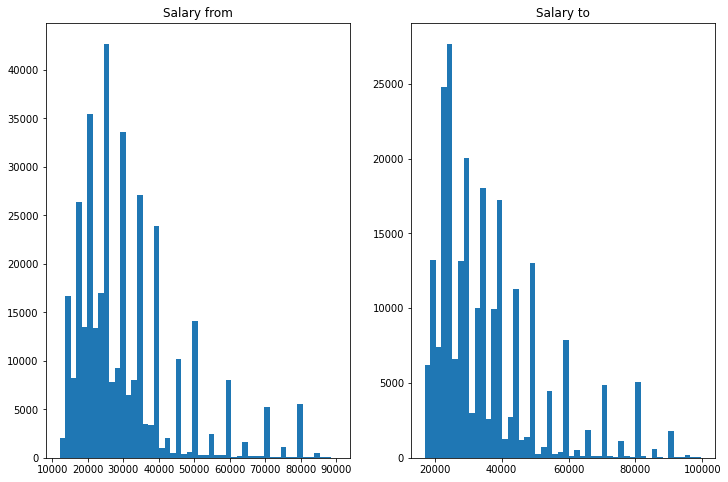

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,8))
n_bins = 50


axs[0].hist(salary_from['salary.from'], bins=n_bins)
axs[0].set_title('Salary from')
axs[1].hist(salary_to['salary.to'], bins=n_bins)
axs[1].set_title('Salary to')

In [ ]:
# расчет зарплат для датасета с неавтоматизированными вакансиями
salary_from2 = not_contains_automated[(not_contains_automated['salary.from'] > not_contains_automated['salary.from'].quantile(0.05)) & (not_contains_automated['salary.from'] < not_contains_automated['salary.from'].quantile(0.95))]
salary_to2 = not_contains_automated[(not_contains_automated['salary.to'] > not_contains_automated['salary.to'].quantile(0.05)) & (not_contains_automated['salary.to'] < not_contains_automated['salary.to'].quantile(0.95))]

Text(0.5, 1.0, 'Salary to')

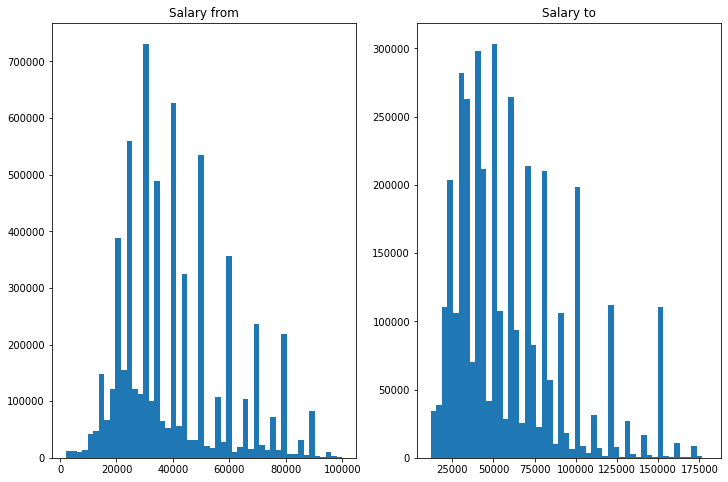

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,8))
n_bins = 50


axs[0].hist(salary_from2['salary.from'], bins=n_bins)
axs[0].set_title('Salary from')
axs[1].hist(salary_to2['salary.to'], bins=n_bins)
axs[1].set_title('Salary to')

In [ ]:
# разница в зар платах
print(salary_from['salary.from'].median())
print(salary_to['salary.to'].median())

print(salary_from2['salary.from'].median())
print(salary_to2['salary.to'].median())

27000.0
31000.0
36000.0
50000.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


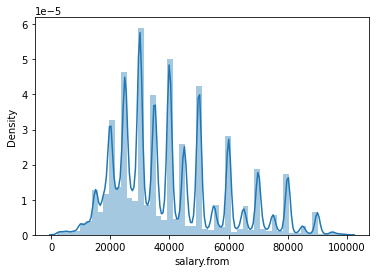

In [ ]:
sns_plot = sns.distplot(salary_from['salary.from'])
fig = sns_plot.get_figure()